In [77]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [78]:
cd C:\Users\Sanjeevees\Desktop\mid

C:\Users\Sanjeevees\Desktop\mid


In [140]:
bwght = pd.read_csv('hprice1.csv')

In [80]:
bwght.shape

(88, 10)

In [81]:
def sstats(data):
    df = (data.mean(),data.std(),data.min(),data.max(),data.median(),data.isnull().sum())
    df = pd.concat(df,axis=1)
    df.columns = ['mean','std','min','max','median','is null']
    return(df)
sstats(bwght)

,mean,std,min,max,median,is null
price,293.546034,102.713445,111.000000,725.000000,265.500000,0
assess,315.736364,95.314437,198.700000,708.600000,290.200000,0
bdrms,3.568182,0.841393,2.000000,7.000000,3.000000,0
lotsize,9019.863636,10174.150414,1000.000000,92681.000000,6430.000000,0
sqrft,2013.693182,577.191583,1171.000000,3880.000000,1845.000000,0
colonial,0.693182,0.463816,0.000000,1.000000,1.000000,0
lprice,5.633180,0.303573,4.709530,6.586172,5.581613,0
lassess,5.717994,0.262113,5.291796,6.563291,5.670566,0
llotsize,8.905105,0.544060,6.907755,11.436920,8.768719,0
lsqrft,7.572610,0.258688,7.065613,8.263591,7.520231,0


In [82]:
Xdata = pd.concat((bwght['bdrms'],bwght['lotsize']),axis=1)
Xdata = sm.add_constant(Xdata)
model1 = smf.OLS(bwght['price'],Xdata).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     21.58
Date:                Thu, 28 Jun 2018   Prob (F-statistic):           2.63e-08
Time:                        18:51:45   Log-Likelihood:                -513.90
No. Observations:                  88   AIC:                             1034.
Df Residuals:                      85   BIC:                             1041.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.2622     39.620      1.597      0.114     -15.512     142.037
bdrms         57.3129     10.885      5.266      0.000      35.672      78.954
lotsize        0.0029      0.001      3.175      0.002       0.001       0.005
==============================================================================
Omnibus:                       16.508   Durbin-Watson:                   2.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.608
Skew:                           0.711   Prob(JB):                     3.72e-07
Kurtosis:                       5.460   Cond. No.                     6.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
Xdata = pd.concat((bwght['llotsize'],bwght['lsqrft']),axis=1)
Xdata = sm.add_constant(Xdata)
model1 = smf.OLS(bwght['lprice'],Xdata).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     74.04
Date:                Thu, 28 Jun 2018   Prob (F-statistic):           2.41e-19
Time:                        18:51:47   Log-Likelihood:                 24.927
No. Observations:                  88   AIC:                            -43.85
Df Residuals:                      85   BIC:                            -36.42
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6401      0.602     -2.725      0.008      -2.837      -0.443
llotsize       0.1685      0.038      4.380      0.000       0.092       0.245
lsqrft         0.7624      0.081      9.425      0.000       0.602       0.923
==============================================================================
Omnibus:                        9.606   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               23.727
Skew:                          -0.006   Prob(JB):                     7.04e-06
Kurtosis:                       5.544   Cond. No.                         360.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [163]:
#adding colonial does not cause any effect to the model result
model1 = smf.ols('price~bdrms+lotsize+(bdrms+lotsize)**2-1',data=bwght).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     356.2
Date:                Thu, 28 Jun 2018   Prob (F-statistic):           5.22e-48
Time:                        20:15:15   Log-Likelihood:                -515.16
No. Observations:                  88   AIC:                             1036.
Df Residuals:                      85   BIC:                             1044.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bdrms            73.8855      3.369     21.931      0.000      67.187      80.584
lotsize           0.0019      0.004      0.509      0.612      -0.006       0.009
bdrms:lotsize     0.0003      0.001      0.281      0.779      -0.002       0.002
==============================================================================
Omnibus:                        6.070   Durbin-Watson:                   2.332
Prob(Omnibus):                  0.048   Jarque-Bera (JB):                8.273
Skew:                           0.231   Prob(JB):                       0.0160
Kurtosis:                       4.429   Cond. No.                     2.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
bwght.groupby(['bdrms']).mean()

,price,assess,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
bdrms,,,,,,,,,
2,251.250000,292.125000,12802.250000,1572.250000,0.000000,5.517506,5.658681,9.355248,7.333385
3,261.979167,280.602381,6848.857143,1809.928571,0.642857,5.548610,5.623769,8.755052,7.481255
4,285.163667,319.703030,9945.151515,2085.242424,0.787879,5.613984,5.734544,8.917036,7.619867
5,518.003571,507.014286,16135.571429,3024.428571,0.857143,6.205942,6.200701,9.519052,7.997836
6,310.000000,253.600000,5348.000000,1386.000000,1.000000,5.736572,5.535758,8.584478,7.234177
7,477.500000,478.100000,8400.000000,3529.000000,1.000000,6.168564,6.169820,9.035987,8.168770


In [86]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [143]:
import matplotlib.pyplot as plt
colormap = {2: 'red', 3: 'green', 4: 'blue', 5: 'orange', 6: 'yellow', 7: 'purple'}
colors = [colormap[x] for x in bwght['bdrms']]

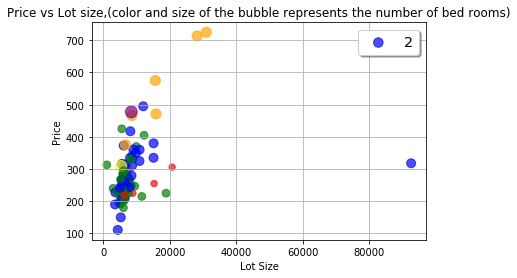

In [169]:
plt.scatter( bwght.lotsize,bwght.price, color=colors, s=bwght.bdrms*20, alpha=0.7) 
plt.xlabel('Lot Size')
plt.ylabel('Price')
plt.title('Price vs Lot size,(color and size of the bubble represents the number of bed rooms)')
plt.legend(colormap,loc=1,shadow=True, fontsize='x-large')
plt.grid(True)
plt.show()

In [92]:
bwght['bdrms'] = pd.cut(bwght['bdrms'],[2,3,5,7])
bwght.groupby(['bdrms']).mean()
#finding the shift in prices

,price,assess,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
bdrms,,,,,,,,,
"(2, 3]",261.979167,280.602381,6848.857143,1809.928571,0.642857,5.548610,5.623769,8.755052,7.481255
"(3, 5]",325.910650,352.482500,11028.475000,2249.600000,0.800000,5.717577,5.816121,9.022389,7.686011
"(5, 7]",393.750000,365.850000,6874.000000,2457.500000,1.000000,5.952568,5.852789,8.810232,7.701474


In [110]:
import pandas as pd

In [164]:
df = pd.DataFrame(bwght)
df['diff'] = df.apply(lambda x: x['price'] - x['assess'], axis=1)

In [ ]:
Plotting differnce in price and assess with resepct to bedrooms

Text(0.5,1,'Difference in price with respect to bed rooms')

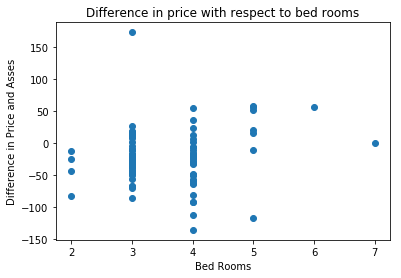

In [165]:
plt.scatter(df.bdrms,df.price-df.assess,data=df)
plt.xlabel('Bed Rooms')
plt.ylabel('Difference in Price and Asses')
plt.title('Difference in price with respect to bed rooms')

In [ ]:
Plotting differnce in price and assess with resepct to lotsize

Text(0.5,1,'Difference in price with respect to change in lot size')

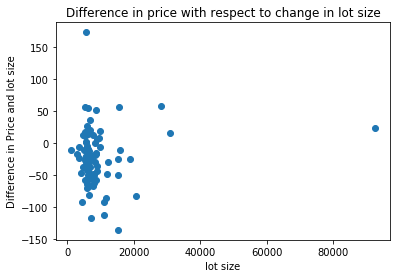

In [167]:
plt.scatter(df.lotsize,df.price-df.assess,data=df)
plt.xlabel('lot size')
plt.ylabel('Difference in Price and lot size')
plt.title('Difference in price with respect to change in lot size')